In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from kan import *
torch.set_default_dtype(torch.float64)

In [3]:
model=KAN(width=[4,9,1],seed=0)
f = lambda x: torch.exp((torch.sin(torch.pi*(x[:,[0]]**2+x[:,[1]]**2))+torch.sin(torch.pi*(x[:,[2]]**2+x[:,[3]]**2)))/2)
dataset = create_dataset(f, n_var=4, train_num=3000)

In [4]:
model.train(dataset=dataset, steps=20, lamb=0.001)

train loss: 7.37e-02 | test loss: 7.18e-02 | reg: 1.35e+01 : 100%|██| 20/20 [00:21<00:00,  1.06s/it]


{'train_loss': [array(0.35451411),
  array(0.14224145),
  array(0.10498494),
  array(0.07797268),
  array(0.06831595),
  array(0.07577388),
  array(0.0724534),
  array(0.07085415),
  array(0.06829421),
  array(0.06700038),
  array(0.07529954),
  array(0.07499386),
  array(0.07454379),
  array(0.07397885),
  array(0.0733579),
  array(0.07562707),
  array(0.07528447),
  array(0.07473999),
  array(0.07421342),
  array(0.07367038)],
 'test_loss': [array(0.35526519),
  array(0.14722433),
  array(0.10808198),
  array(0.08014332),
  array(0.06718379),
  array(0.07612014),
  array(0.07208496),
  array(0.06954214),
  array(0.06650762),
  array(0.06626174),
  array(0.07453447),
  array(0.07403871),
  array(0.07310199),
  array(0.07275973),
  array(0.07115714),
  array(0.073625),
  array(0.07348051),
  array(0.07230822),
  array(0.0721146),
  array(0.07175126)],
 'reg': [array(18.96536772),
  array(18.72385577),
  array(18.1635083),
  array(17.6239599),
  array(16.86332293),
  array(16.46370035),

In [5]:
grids=[5,10,20,50]
train_losses=[]
test_losses=[]
train_rmse=[]
test_rmse=[]
for i in range(len(grids)):
    model=KAN(width=[4,9,1],grid=grids[i],seed=0).initialize_from_another_model(model,dataset['train_input'])
    results=model.train(dataset=dataset,steps=50,stop_grid_update_step=30)
    train_losses+=results['train_loss']
    test_losses+=results['test_loss']
    train_rmse.append(results['train_loss'][-1].item())
    test_rmse.append(results['test_loss'][-1].item())

train loss: 1.78e-02 | test loss: 2.20e-02 | reg: 1.67e+01 : 100%|██| 50/50 [00:58<00:00,  1.16s/it]
train loss: 6.57e-03 | test loss: 9.56e-03 | reg: 1.71e+01 : 100%|██| 50/50 [01:20<00:00,  1.62s/it]
train loss: 5.25e-03 | test loss: 1.13e-02 | reg: 1.67e+01 : 100%|██| 50/50 [02:00<00:00,  2.41s/it]
train loss: 2.49e-03 | test loss: 1.71e-02 | reg: 1.67e+01 : 100%|██| 50/50 [03:40<00:00,  4.41s/it]


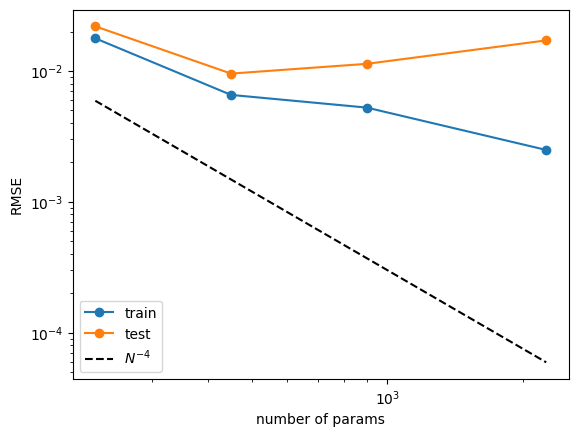

In [18]:
n_params = np.array(grids) * (4*9+9*1)
plt.plot(n_params, train_rmse, marker="o")
plt.plot(n_params, test_rmse, marker="o")
plt.plot(n_params, 300*n_params**(-2.), color="black", ls="--")
plt.legend(['train', 'test', r'$N^{-4}$'], loc="lower left")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('number of params')
plt.ylabel('RMSE')
plt.show()

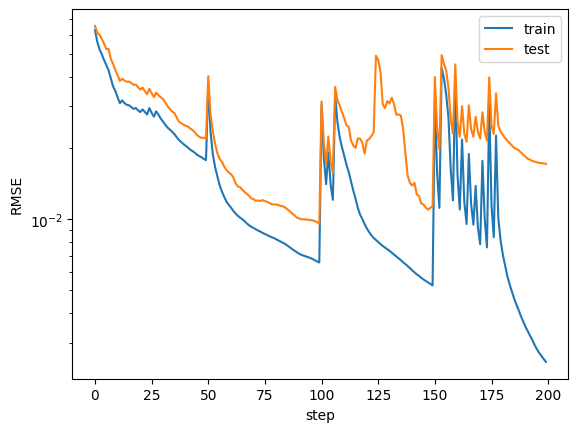

In [7]:
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')
plt.show()